<a href="https://colab.research.google.com/github/HilmyMhiii/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


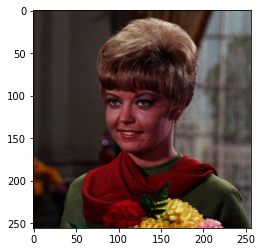

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
image = cv.cvtColor(img_f,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma : 3


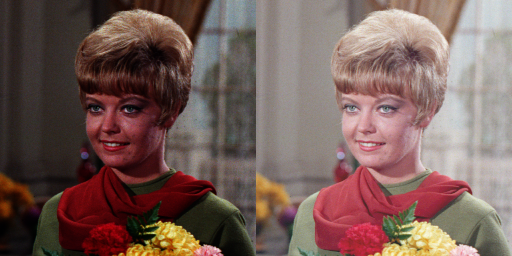

In [5]:
# Praktikum 1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma : '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

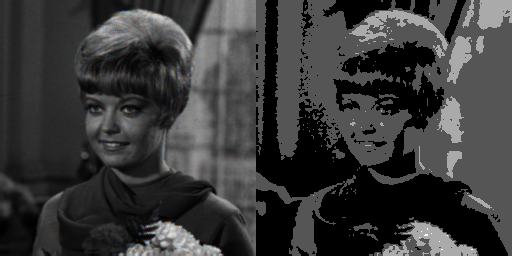

In [12]:
# Praktikum 2
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff' ,cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img,cv.COLOR_BAYER_BG2BGR)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_image[y,x] = np.clip(round(original[y,x,0] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

Nilai PSNR adalah  27.54153764097005 (dB)


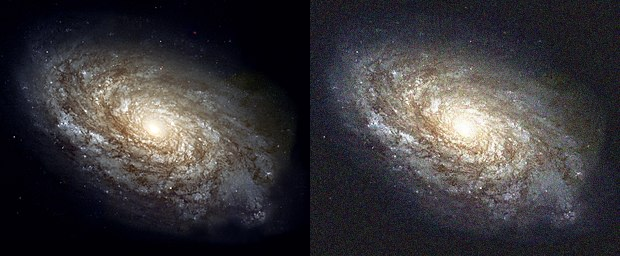

In [21]:
# Praktikum 3
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises-20220314T044609Z-001/noises/*'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # jumlah citra array yang di average
for i in range(noise_number):
  if i == 0 :
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20* log10(max_pixel / sqrt(mse))
  return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah ', psnr, '(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.514736795090016 (dB)


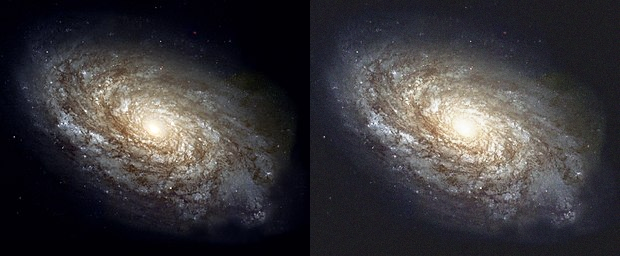

In [22]:
dst = cv_img[0]
noise_number = 29 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.482238197627744 (dB)


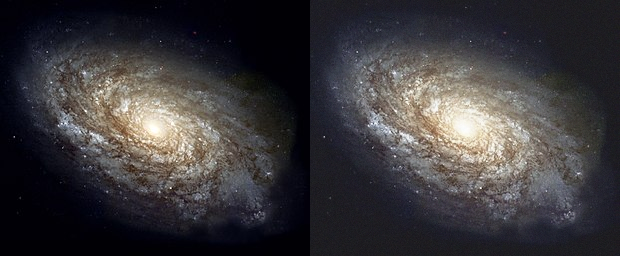

In [23]:
dst = cv_img[0]
noise_number = 59 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.510724719614934 (dB)


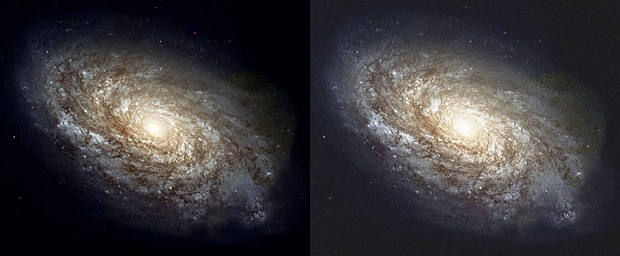

In [24]:
dst = cv_img[0]
noise_number = 79 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51683306649657 (dB)


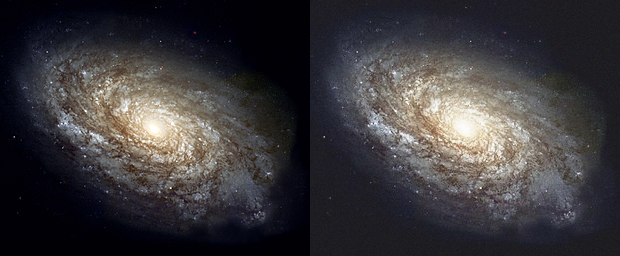

In [25]:
dst = cv_img[0]
noise_number = 99 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

t =  256 l =  256


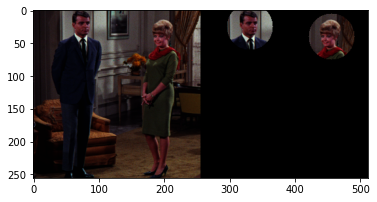

In [31]:
#Praktikum 4
couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
couple2 = cv.cvtColor(couple,cv.COLOR_BGR2RGB)
t=couple2.shape[0]
l=couple2.shape[1]
print("t = ",t,"l = ",l)

mask = np.zeros(couple2.shape,dtype=np.uint8)
mask = cv.circle(mask,(200, 40), 35, (255,255,255), -1)
mask1 = cv.circle(mask,(75,25), 35, (255,255,255), -1)

result = couple2 & mask & mask1 

circle_frame = cv.hconcat((couple2, result))
plt.imshow(circle_frame)

t =  256 l =  256


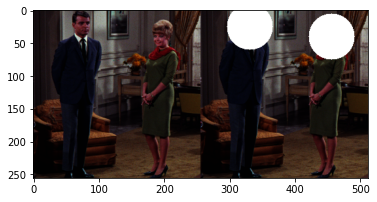

In [32]:
# OR
couple2 = cv.cvtColor(couple,cv.COLOR_BGR2RGB)
t=couple2.shape[0]
l=couple2.shape[1]
print("t = ",t,"l = ",l)

mask = np.zeros(couple2.shape,dtype=np.uint8)
mask = cv.circle(mask,(200, 40), 35, (255,255,255), -1)
mask1 = cv.circle(mask,(75,25), 35, (255,255,255), -1)

result = couple2 | mask & mask1 

circle_frame = cv.hconcat((couple2, result))
plt.imshow(circle_frame)

t =  256 l =  256


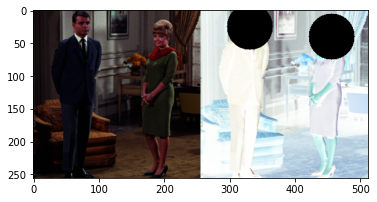

In [36]:
# NOT
couple2 = cv.cvtColor(couple,cv.COLOR_BGR2RGB)
t=couple2.shape[0]
l=couple2.shape[1]
print("t = ",t,"l = ",l)

mask = np.zeros(couple2.shape,dtype=np.uint8)
mask = cv.circle(mask,(200, 40), 35, (255,255,255), -1)
mask1 = cv.circle(mask,(75,25), 35, (255,255,255), -1)

result = ~couple2 & ~mask & ~mask1 

circle_frame = cv.hconcat((couple2, result))
plt.imshow(circle_frame)

t =  256 l =  256


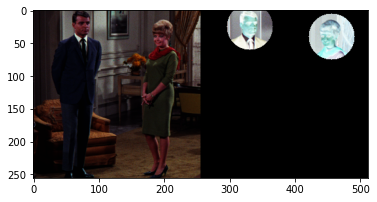

In [37]:
# NAND
couple2 = cv.cvtColor(couple,cv.COLOR_BGR2RGB)
t=couple2.shape[0]
l=couple2.shape[1]
print("t = ",t,"l = ",l)

mask = np.zeros(couple2.shape,dtype=np.uint8)
mask = cv.circle(mask,(200, 40), 35, (255,255,255), -1)
mask1 = cv.circle(mask,(75,25), 35, (255,255,255), -1)

result = ~couple2 & mask & mask1 

circle_frame = cv.hconcat((couple2, result))
plt.imshow(circle_frame)

t =  256 l =  256


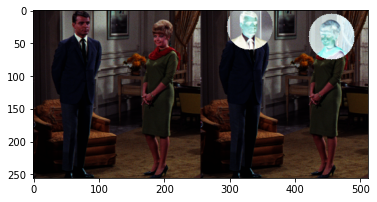

In [38]:
# XOR
couple2 = cv.cvtColor(couple,cv.COLOR_BGR2RGB)
t=couple2.shape[0]
l=couple2.shape[1]
print("t = ",t,"l = ",l)

mask = np.zeros(couple2.shape,dtype=np.uint8)
mask = cv.circle(mask,(200, 40), 35, (255,255,255), -1)
mask1 = cv.circle(mask,(75,25), 35, (255,255,255), -1)

result = couple2 ^ mask & mask1 

circle_frame = cv.hconcat((couple2, result))
plt.imshow(circle_frame)